In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load

In [34]:
data = pd.read_csv("temperature_sensor.csv")

In [35]:
data.head(15)

In [36]:
pd.Series(data["room_id/id"].unique()).count()

1

In [37]:
data.drop(columns="room_id/id",inplace=True)

### Converting noted_date to Datetime formate

In [38]:
data["Date_Time"] = pd.to_datetime(data["noted_date"])

In [39]:
data.drop(columns="noted_date",inplace=True)

In [40]:
df = data.set_index('Date_Time')

In [41]:
df

,id,temp,out/in
Date_Time,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,29,In
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,29,In
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,41,Out
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,41,Out
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,31,In
...,...,...,...
2018-07-28 07:07:00,__export__.temp_log_91076_7fbd08ca,31,In
2018-07-28 07:07:00,__export__.temp_log_147733_62c03f31,31,In
2018-07-28 07:06:00,__export__.temp_log_100386_84093a68,31,In


### IN / OUT

In [42]:
x = list(df["out/in"])
np.unique(x)

array(['In', 'Out'], dtype='<U3')

In [43]:
In,out = x.count('In'),x.count('Out')

In [44]:
In,out

(20345, 77261)

### Grouping using Date and out/in

In [45]:
df1 = df.groupby(df.index).mean()
df2 = df.groupby(["out/in"]).mean()

C:\Users\edith\AppData\Local\Temp\ipykernel_22484\4090001551.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(df.index).mean()
C:\Users\edith\AppData\Local\Temp\ipykernel_22484\4090001551.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(["out/in"]).mean()


In [46]:
df1

,temp
Date_Time,
2018-01-11 00:06:00,32.0
2018-01-11 00:07:00,40.0
2018-01-11 00:09:00,39.0
2018-01-11 00:13:00,40.0
2018-01-11 00:23:00,40.0
...,...
2018-12-10 23:41:00,44.0
2018-12-10 23:43:00,44.0
2018-12-10 23:49:00,44.0


In [47]:
df2

,temp
out/in,
In,30.453920
Out,36.265244


<Axes: xlabel='Date_Time'>

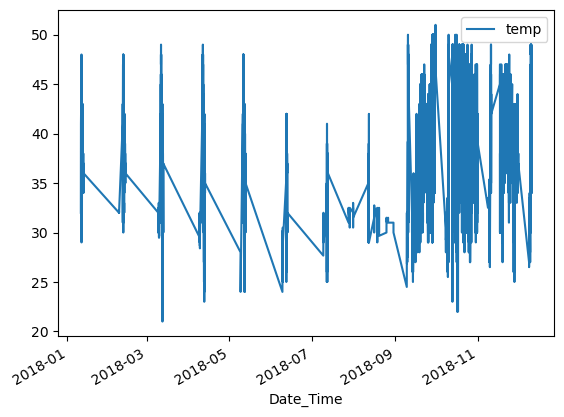

In [48]:
df1.plot()

In [49]:
df_in = df[df["out/in"]=="In"]
df_in = df_in.groupby(["Date_Time"]).mean()

C:\Users\edith\AppData\Local\Temp\ipykernel_22484\847824507.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_in = df_in.groupby(["Date_Time"]).mean()


In [50]:
df_out =  df[df["out/in"]=="Out"]
df_out = df_out.groupby(["Date_Time"]).mean()

C:\Users\edith\AppData\Local\Temp\ipykernel_22484\607358783.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_out = df_out.groupby(["Date_Time"]).mean()


### Plotting Data

Text(0, 0.5, 'temperature')

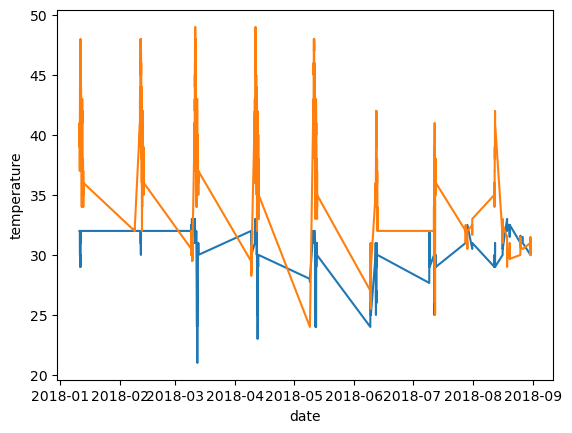

In [51]:
plt.plot(df_in.loc[:'2018-9-09 03:09:00'] )
plt.plot(df_out.loc[:'2018-9-09 03:09:00'])
plt.xlabel('date')
plt.ylabel('temperature')

### Scaler

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
sc = StandardScaler()
df_scaler = sc.fit_transform(df1)
df_min = minmax_scale(df1)

### Normality

In [57]:
from scipy.stats import normaltest
normaltest(df_scaler.squeeze()),normaltest(df_min.squeeze())

(NormaltestResult(statistic=9176.867413111146, pvalue=0.0),
 NormaltestResult(statistic=9176.86741311117, pvalue=0.0))

### Plotting

Text(0.5, 0, 'original')

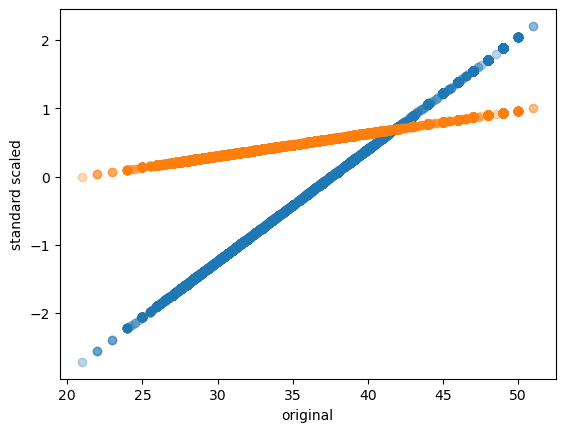

In [58]:
plt.scatter(df1, df_scaler, alpha=0.3)
plt.scatter(df1, df_min, alpha=0.3)
plt.ylabel("standard scaled")
plt.xlabel("original")

### plotting scaled data over time

Text(0, 0.5, 'temperature')

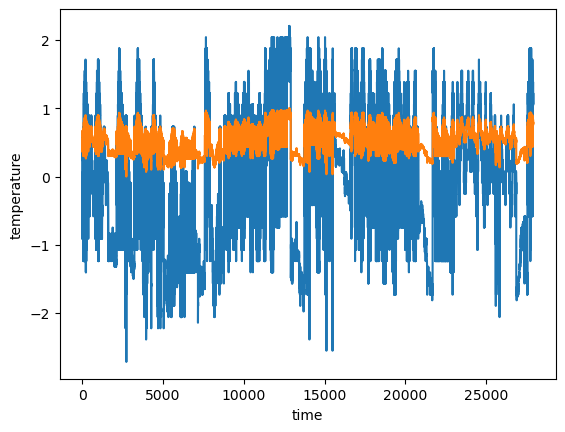

In [60]:
plt.plot(df_scaler)
plt.plot(df_min)
plt.xlabel('time')
plt.ylabel('temperature')

### Perform seasonal decomposition using statsmodels

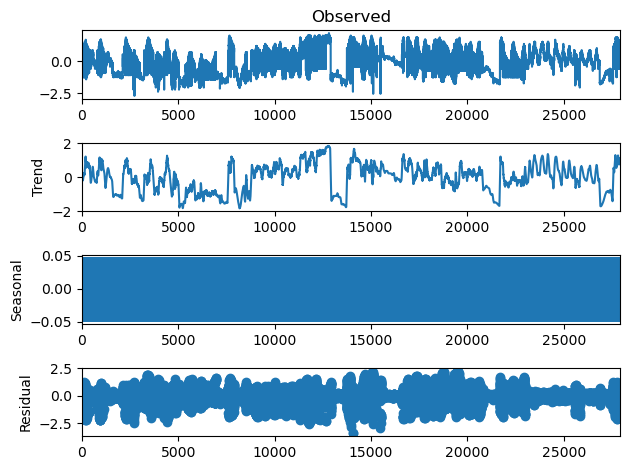

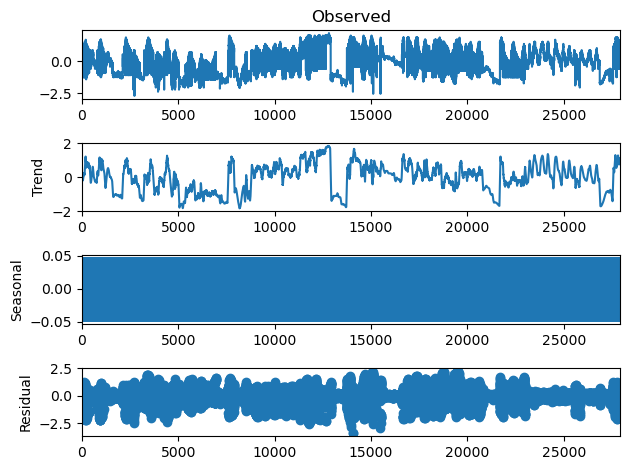

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_scaler, model='additive', period=52)
result.plot()

### Arima

In [63]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(endog=df_scaler,order=(1,1,3))
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                27920
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -25921.069
Date:                Sun, 16 Apr 2023   AIC                          51852.139
Time:                        21:06:54   BIC                          51893.324
Sample:                             0   HQIC                         51865.399
                              - 27920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1022      0.039     -2.625      0.009      -0.179      -0.026
ma.L1         -0.7371      0.039    -18.980      0.000      -0.813      -0.661
ma.L2         -0.0263      0.033     -0.799      0.425      -0.091       0.038
ma.L3         -0.0933      0.004    -26.358      0.000      -0.100      -0.086
sigma2         0.3749      0.002    171.190      0.000       0.371       0.379
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9831.93
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

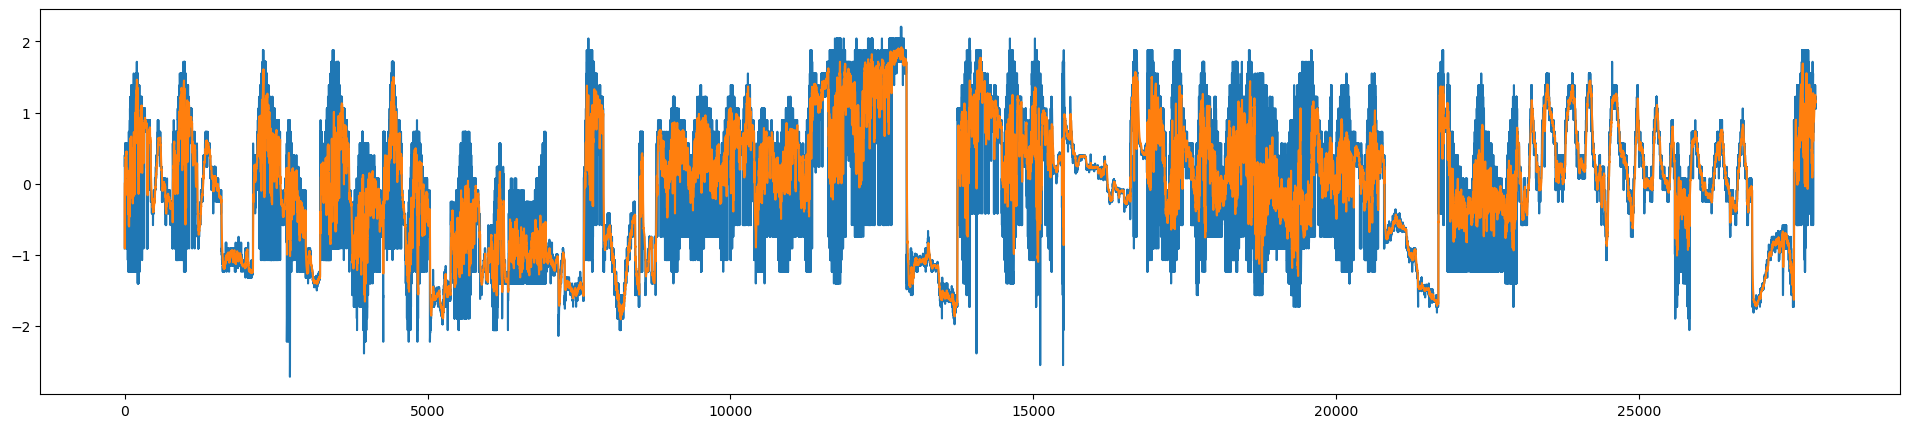

In [66]:
plt.figure(figsize=(24,5))
plt.plot(df_scaler)
plt.plot(model.predict())
plt.show()